## Iris Flower Data Set Project

***

Author: Emma Dunleavy

Module Fundamentals of Data Analytics Winter 2023/24 

Lecturer: Ian McLoughlin
***

The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.5

- The notebook should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for each variable.
- The notebook should follow a cohesive narrative about the data set.


#### Classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

https://en.wikipedia.org/wiki/Level_of_measurement

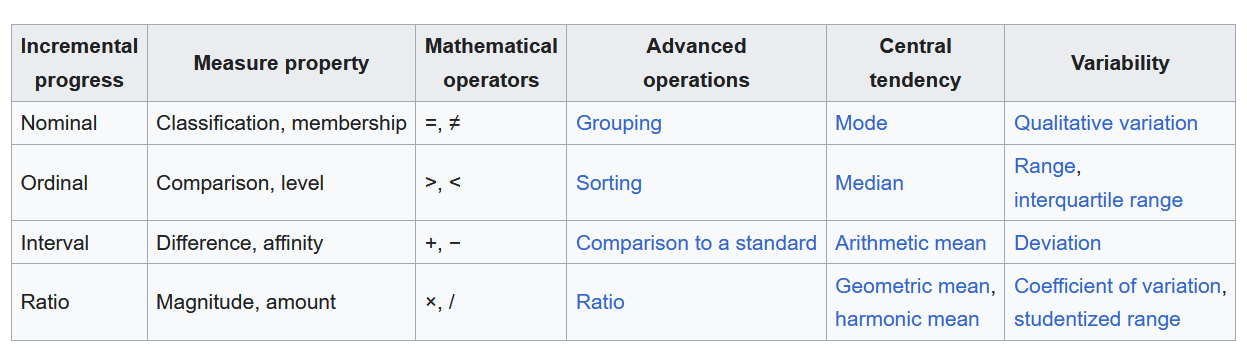

Import the required libraries to run the code.

In [1]:
# All libraries required for this notebook will be contained in this cell.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ["sepal_length_in_cm",
            "sepal_width_in_cm",
            "petal_length_in_cm",
            "petal_width_in_cm",
            "class"]

iris_data = pd.read_csv(csv_url, names=col_names) 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Show summary statistics
iris_data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 ||sepal_length_in_cm |sepal_width_in_cm |petal_length_in_cm| petal_width_in_cm  |class |
 |---|:---|---|---|---|---|
 |**data type in original data set**|float64|float64|float64|float64|object|
 |**variable in original data set**|numerical|numerical|numerical|numerical|categorical|

In [4]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

In [5]:
normal_pdf(0.0)

0.3989422804014327

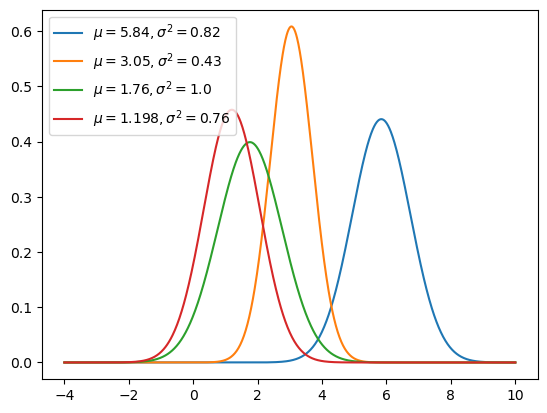

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-4.0, 10.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[5.84, 0.82], [3.05, 0.43], [1.76, 1.0], [1.198, 0.76]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()


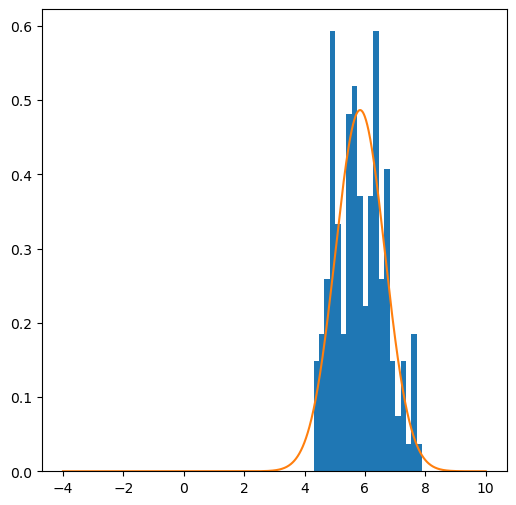

In [15]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 6))

d1 = iris_data['sepal_length_in_cm']

# Plot a histogram.
ax.hist(x=iris_data['sepal_length_in_cm'], bins=20, density=True)
y = normal_pdf(x, mu=5.84, sigma= 0.82)
ax.plot(x, y)

the four common scales of measurement: nominal, ordinal, interval and ratio.

• Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

• Select, demonstrate, and explain the most appropriate plot(s) for each variable.

• The notebook should follow a cohesive narrative about the data set.

## References

Iris – UCI Machine Learning Repository. Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).